In [27]:
using Pkg
Pkg.activate("../.")
using LuxorDiagrams
using Librsvg_jll
using Luxor
using MathTeXEngine
using LaTeXStrings
using Parameters


  Activating project at `~/MEGA/EMAp/LuxorDiagrams.jl`


In [28]:
abstract type DiagramVertex end

In [113]:
@with_kw mutable struct DVertex <: DiagramVertex
    label::AbstractString = ""
    pt::Point
end

function Diagram(;nrows=1, ncols=1,sizerow=40, sizecol=80)
    return Drawing(ncols*sizecol, nrows*sizerow,:svg), Table(nrows,ncols,sizecol,sizerow)
end

function drawgrid(p::Table)
    @layer begin
        bp = p[1:end] .+ Point(-p.colwidths[1],p.rowheights[1])/2
        setline(0.5)
        setdash("dot")
        sethue("grey")
        rect.(bp,p.colwidths[1],-p.rowheights[1],:stroke)
        circle.(p[1:end],2,:fill)
    end
end

function drawobj(pt::Point=O, obj="", labelpos=:S, labeloffset=10; objsize=5)
    circle(pt, objsize,:fill)
    label(obj,labelpos,pt, offset=labeloffset)
end

drawobj (generic function with 5 methods)

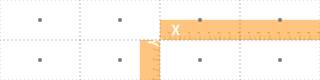

In [115]:
d,p = Diagram(;nrows=2, ncols=4, sizerow=40, sizecol=80)
origin()
rulers()
drawgrid(p)
finish()
d